# ffnetdemo

This is the ffnetdemo added with a new section 4. Visualize output of XOR net over a region between (-.5, -.5) and (1.5,1.5) using grid points of increment = 0.02.

Given (a) the structure of a multilayer perceptron, (b) weight matrices (including bias) and (c) input data X, compute output Y. 

1) Data File: XOR Problem

In [1]:
import numpy as np
X = np.mat([[0,0],[0,1],[1,0],[1,1]])
(K,d) = np.shape(X)
Label = [[0],[1],[1],[0]]

2) Define a data structure mlp

In [3]:
class perceptron():
  def __init__(self, Label, K, d):
    self.Nlayers = 2                       # Number of Layers
    self.Lsize = [10, np.shape(Label)[1]]  # 1x Nlayers vector of Integers
    # Number of neurons per layer. Last layer is output layer.
    # f(): Nonlinear transfer function call actfunp()
    #      1 - sigmoid (logsig), 2 - tanh ( tansig), 3 - linear (purelin),
    #      4 - radial, 5 - softmax (softmax), 6 - Relu, 8 - step (hardlim)  
    self.TransferFn = [7, 7]
    self.Nsamples = K
    self.featureDimension = d

    # Activation is evaluated as A[0] = f([1 X]*W[0]) and
    # A[i] = f([1 A[i-1]]) where
    # A[i]: K x Lsize(i) i-th layer activation matrix, 
    # W[i]: (1+ Lsize(i-1)) x Lsize(i) i-th layer weight matrix
    #        first row of W(i) is the bias
    # W[0]: (1+d) x Lsize(1)
    A = []
    self.W = []
    self.W.append(np.mat([[-.5, -.5],[1,-1],[-1,1]]))
    self.W.append(np.mat([[-.5],[1],[1]]))
    
    self.A = [[]] * 2



actfunp1 is used to compute activation functions and their derivatives.

In [4]:
def actfunp1(u,tp=1, par=1):
  # Usage: [y,yp]=actfunp(u, tp, par)
  # Compute activation functions and their derivatives
  # u: net function, a K x N matrix
  # y: activation function, a K x N matrix
  # tp: 1 - sigmoid, 2 - tanh, 3- linear, 4 - radial 5 - softmax
  #       6 - ReLu,  7, Hardlim (step)
  # par: parameter list
  #    sigmoid: T,  y=1/(1+exp(-u/T)), yp=y*(1-y)/T
  #    tanh: T,     y=(exp(u/T)-exp(-u/T))/(exp(u/T)+exp(-u/T))
  #                 yp=(1-y*y)/T
  #    linear:m,b   y=au+b, yp=a
  #    radial:m,sig y=exp(-(u-m)^2/sig^2), yp=-2(u-m)*y/sig^2
  #    softmax: y = exp(u)/sum(exp(u(k,:)), yp(k) = y(k)*(1-y(k))
  #    ReLU:  y = u if u >0 and = 0 otherwise.  yp = 1 if u > 0 and = 0 o.w.
  #    Step, hardlim: y = 1 if u>=0, = 0 if u < 0, yp = 0 for all u

  (K,N) = np.shape(u)

  if tp == 1:
    T = par
    y = np.reciprocal(1 + np.exp(-u/T))
    yp  = np.multiply(y, np.ones(np.shape(y)) - y)/T
  if tp == 2:
    T = par
    tmp = np.exp(u/T)
    y = np.divide(tmp - np.reciprocal(tmp),tmp + np.reciprocal(tmp))
    yp = (np.ones(np.shape(y)) - np.multiply(y, y))/T
  if tp == 3:
    a = par[0]
    b = par[1]
    y = a*u + b
    yp = a* np.ones(np.shape(y))
  if tp == 4:
    m = par[0]
    sig = par[1]
    s = sig**2
    tmp = np.multiply(u - m, u - m)
    y = np.exp(-tmp/s)
    yp = np.multiply((-2/s) * (u - m), y)
  if tp == 5:
    eu = np.exp(u)
    sv = np.mat(np.sum(eu,axis=1)).T
    y = np.divide(eu, sv*np.ones((1,N)))
    yp = np.multiply(y,np.ones((K,N)) - y)
  if tp == 6:
    yp = (u > 0).astype(int)
    y = np.multiply(u, yp)
  if tp == 7:
    yp = np.zeros(np.shape(u))
    y = (u >= 0).astype(int)

  return y, yp


3) Evaluate the output of the xor problem. 

In [5]:
mlp = perceptron(Label, K, d)
one_mat = np.ones((K,1))
u = np.concatenate((one_mat,X),axis=1)*mlp.W[0]
mlp.A[0],_ = actfunp1(u,mlp.TransferFn[0])
u = np.concatenate((one_mat, mlp.A[0]),axis=1)*mlp.W[1]
mlp.A[1],_ = actfunp1(u,mlp.TransferFn[1])

print("Outputs are: " + str(mlp.A[1].T))

Outputs are: [[0 1 1 0]]


4) Visualize the output in a 2D space.

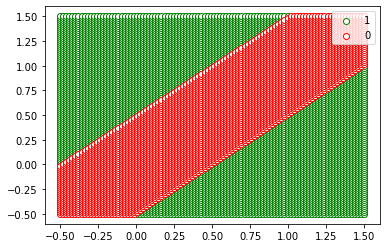

In [25]:
import matplotlib.pyplot as plt

X2, X1 = np.meshgrid(np.linspace(-.5,1.5,100), np.linspace(-.5,1.5,100))
X1 = X1.flatten()
X2 = X2.flatten()
K1 = len(X1)
one_mat = np.ones((K1,1))
##### Below are the solutions
#A1 is the hidden layer activation
u = np.concatenate((one_mat,np.array([X1,X2]).T),axis=1)*mlp.W[0]
A1,_ = actfunp1(u,mlp.TransferFn[0])
# out is the output of the 2nd layer neuron.
u = np.concatenate((one_mat, A1),axis=1)*mlp.W[1]
out,_ = actfunp1(u,mlp.TransferFn[1])
##### above are the solutions.

id1,_ = np.nonzero(out)
id2,_ = np.nonzero(out == 0)
plt.scatter(X1[id1],X2[id1],color='white',edgecolors='green')
plt.scatter(X1[id2],X2[id2],color='white',edgecolors='red')
plt.legend([1,0])
plt.show()